In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/home/torsten/ms/citrus_data_set/04_13D_Jackal/imu0.csv")
df

,sec,nanosec,la_x,la_y,la_z,av_x,av_y,av_z
0,1689715534,91000000,-0.496821,-0.153108,9.782327,-0.000900,-0.001035,-0.002023
1,1689715534,91000000,-0.495266,-0.152298,9.782481,-0.001590,-0.000036,-0.001917
2,1689715534,91000000,-0.496817,-0.156778,9.787970,-0.002529,0.000615,-0.002204
3,1689715534,95000000,-0.490604,-0.153740,9.789993,-0.000724,-0.000142,-0.002412
4,1689715534,101000000,-0.483991,-0.150859,9.785980,-0.001031,-0.000353,-0.000899
...,...,...,...,...,...,...,...,...
102261,1689716045,350000000,0.728670,0.064752,10.274380,0.051122,0.668617,-0.033442
102262,1689716045,357000000,0.748874,-0.133532,10.508646,0.037269,0.666869,-0.043552
102263,1689716045,357000000,0.277753,0.460167,11.218273,0.019286,0.663680,-0.052823
102264,1689716045,363000000,-0.419892,1.103610,12.020783,-0.017072,0.635153,-0.062450


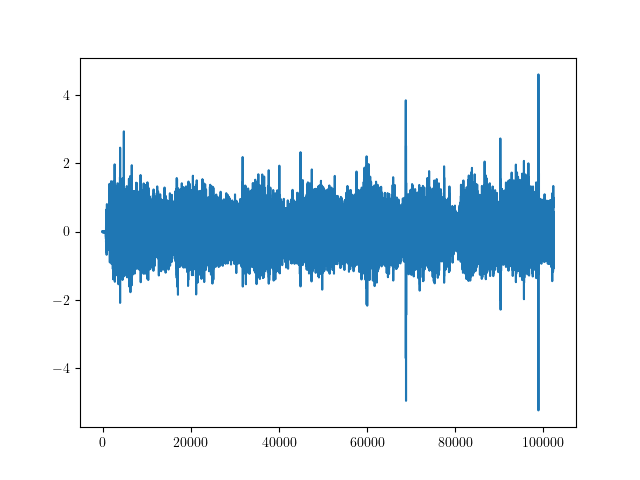

In [10]:
%matplotlib widget
plt.figure()
plt.plot(np.diff(df.iloc[:, 2]))
plt.show()

May 2023: Linear acceleration and angular velocity were changed around in the ROS message.  
Stereolabs claim coord system to be Axis: X FORWARD, Y LEFT, Z UP.  
It looks like X points down

<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_78493/556567006.py:8: SyntaxWarning: invalid escape sequence '\o'
  "$\omega_x$",
/tmp/ipykernel_78493/556567006.py:9: SyntaxWarning: invalid escape sequence '\o'
  "$\omega_y$",
/tmp/ipykernel_78493/556567006.py:10: SyntaxWarning: invalid escape sequence '\o'
  "$\omega_z$",]


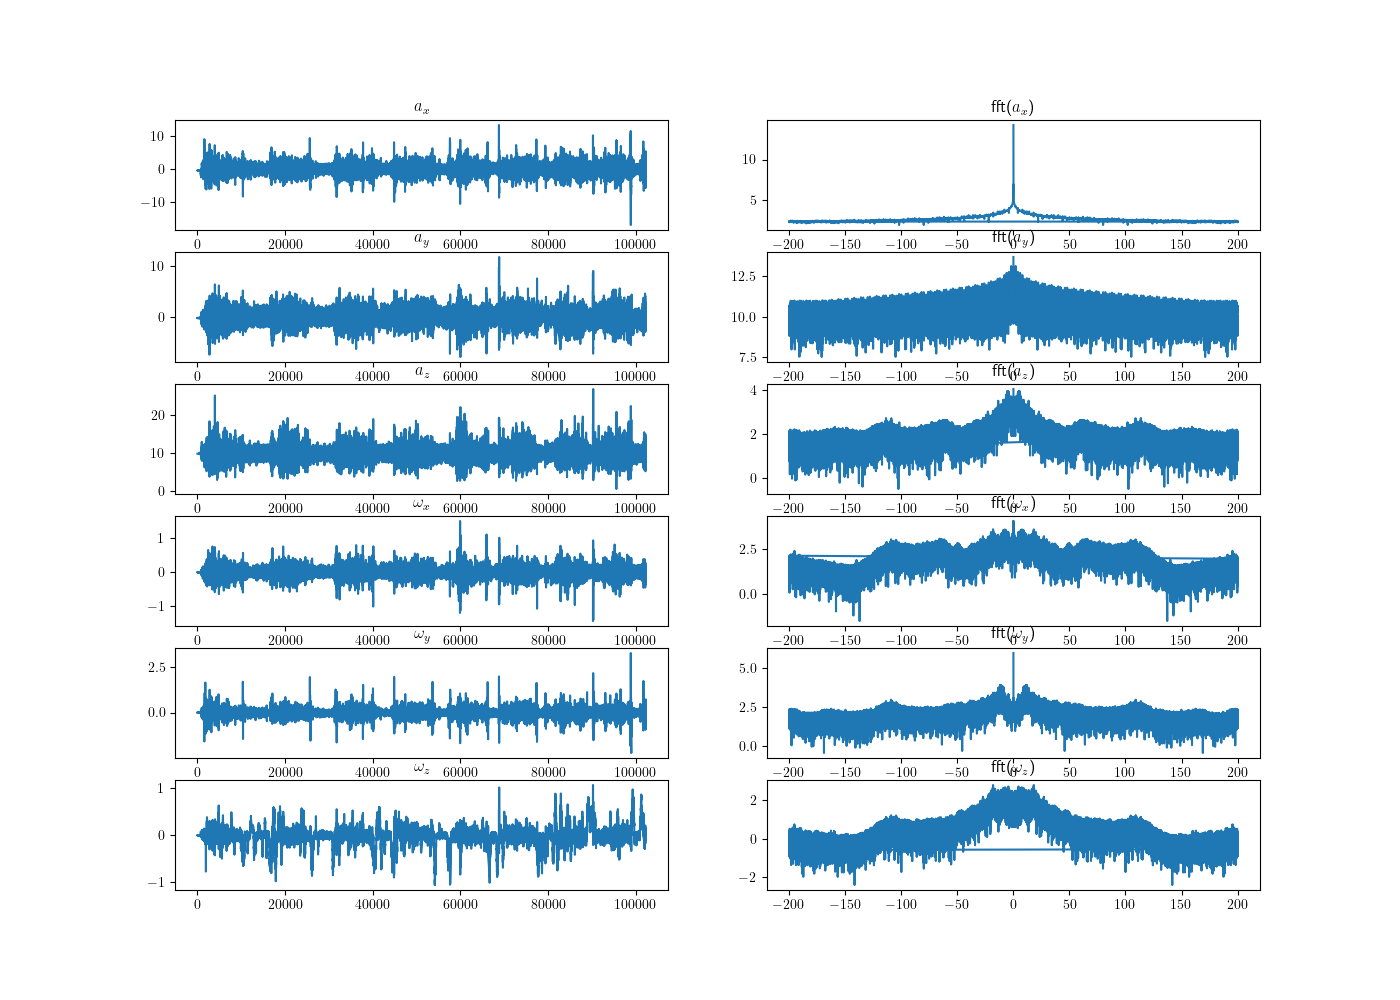

In [9]:
%matplotlib widget
plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
titles = [
    "$a_x$",
    "$a_y$",
    "$a_z$",
    "$\omega_x$",
    "$\omega_y$",
    "$\omega_z$",]

plt.figure(figsize=(14,10))
for i in range(6):
    plt.subplot(6,2,i*2+1)
    plt.title(titles[i])
    plt.plot(df.iloc[:,i+2])
    plt.subplot(6,2,i*2+2)
    plt.title("fft("+titles[i]+")")
    plt.plot(np.fft.fftfreq(df.iloc[:,i].shape[0], 1/400),np.log10(np.abs(np.fft.fft(df.iloc[:,i].values))))
plt.show()
         

# Basic attempt at dead reckoning
Try a two dimensional integration with rotaion around vertial axis and movement forward and back. Use $\omega_x$ as rotational axis and $a_y$ as forward/backward acceleration.

In [17]:
w_x = df.iloc[:,7].values
a_y = df.iloc[:,3].values

pos = np.asarray([0, 0], dtype=float) #(x, y)
vel = 0 #m/s
O = 0 # rad/s orientation
dt = 1/200

pos_history = np.zeros((w_x.shape[0], 2))
vel_history = np.zeros((w_x.shape[0], 1))

for i in range(w_x.shape[0]):
    vel += a_y[i] * dt
    vel_history[i] = vel
    delta_s = vel * dt # Displacement at timestep

    O += w_x[i] * dt # Orientation
    delta_x = np.asarray([np.cos(O), np.sin(O)], dtype=float) * delta_s
    pos += delta_x
    pos_history[i, 0] = pos[0]
    pos_history[i, 1] = pos[1]    


<function matplotlib.pyplot.show(block=None)>

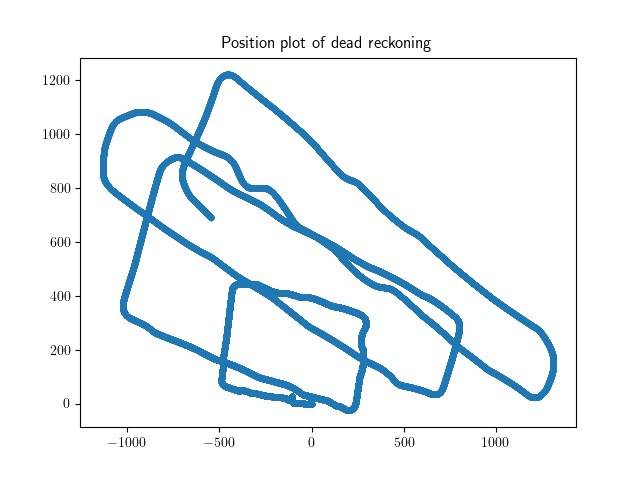

In [18]:
plt.figure()
plt.title("Position plot of dead reckoning")
plt.scatter(pos_history[:, 0], pos_history[:, 1], marker=".")
plt.show

<function matplotlib.pyplot.show(block=None)>

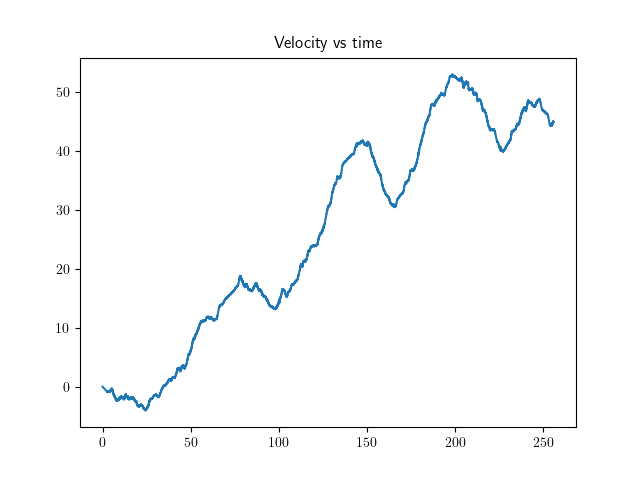

In [19]:
plt.figure()
plt.title("Velocity vs time")
t = np.arange(vel_history.shape[0]) * (1/400)
plt.plot(t, vel_history)
plt.show

# Finding gravity vector

<function matplotlib.pyplot.show(block=None)>

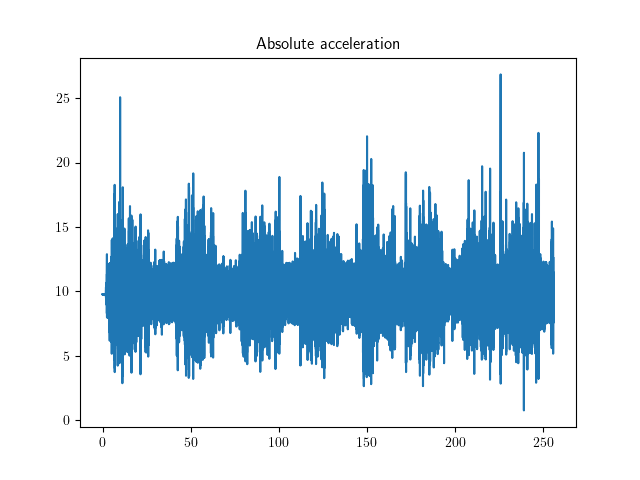

In [8]:
abs_a = np.sqrt(np.power(df.iloc[:,4].values, 2) + np.power(df.iloc[:,5].values, 2) + np.power(df.iloc[:,5].values, 2))

plt.figure()
plt.title("Absolute acceleration")
plt.plot(t, abs_a)
plt.show